In [ ]:
# supervised Learning 에서 -> 
# Regression = 연속형 변수
# Classification = 범주형 변수(숫자가 아닌 것) -> Logistic Regression
# 주어진 데이터를 정해진 범주(Category)에 따라 분류 
# 선형 회귀 방식을 분류에 적용한 알고리즘, 데이터가 어떤 범주에 속할 확률을 0~1 사이의 값으로 예측, 더 높은 범주에 속하는 쪽으로 분류
# 예 ) 범주 : true/false , yes/ no 
# 스팸메일, 은행 대출, 악성 여부, 제품 구매의사 등

# 시그모이드 함수(sigmoid) / Logistic 함수
y= mx + b -> P = 1 / (1+e^-y)  -> y값이 아무리 커져도 1에만 수렴, y 값이 아무리 작아져도 0에만 수렴 -> 0~1사이의 확률 구함
ln(P/1-P) = mx + b


##  04. Logistic Regression

### 공부 시간에 따른 자격증 시험 합격 가능성

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('LogisticRegressionData.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## 데이터 분리

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

## 학습(로지스틱 회귀 모델)

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

## 6시간 공부했을 때 예측?

In [10]:
classifier.predict([[6]]) # 2차원 배열 기대하기 때문에 ([[]])형태 / 6시간 공부했을 때는 결과가 1이 나옴

array([1], dtype=int64)

In [12]:
classifier.predict_proba([[6]]) # 합결할 확률 출력
#(불합격 확률 , 합격할 확률)

array([[0.14150735, 0.85849265]])

In [11]:
classifier.predict([[4]]) # 4시간 공부했을 때는 결과가 0이 나옴

array([0], dtype=int64)

### 분류 결과 예측(테스트 세트)

In [13]:
y_pred = classifier.predict(X_test)
y_pred # 예측 값

array([1, 0, 1, 1], dtype=int64)

In [14]:
y_test # 실제 값 (테스트 세트)

array([1, 0, 1, 0], dtype=int64)

In [15]:
X_test # 공부시간 (테스트 세트)

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [16]:
classifier.score(X_test, y_test) # 모델 평가
# 전체 테스트 세트 4개 중에서 분류 예측을 올바로 맞힌 개수 3개 -> 3/4 = 0.75 -> 회귀와 평가 방법이 다름

0.75

### 데이터 시각화(훈련 세트)

In [17]:
X_range = np.arange(min(X), max(X), 0.1) # x의 최소값에서 최대값까지를 0.1 단위로 잘라서 데이터 생성
X_range

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

In [19]:
# p = 1 / (1+np.exp(-y)  # y = mx + b
p = 1 / (1+np.exp(-(classifier.coef_ * X_range * classifier.intercept_)))
p

array([[4.87107961e-02, 2.74835081e-02, 1.53573530e-02, 8.53449570e-03,
        4.72829370e-03, 2.61509884e-03, 1.44497340e-03, 7.98001444e-04,
        4.40576707e-04, 2.43203495e-04, 1.34239299e-04, 7.40914906e-05,
        4.08926526e-05, 2.25691796e-05, 1.24561175e-05, 6.87460347e-06,
        3.79412402e-06, 2.09399091e-06, 1.15568036e-06, 6.37823460e-07,
        3.52016601e-07, 1.94278949e-07, 1.07223089e-07, 5.91767171e-08,
        3.26597918e-08, 1.80250281e-08, 9.94806205e-09, 5.49036250e-09,
        3.03014599e-09, 1.67234580e-09, 9.22972193e-10, 5.09390861e-10,
        2.81134200e-10, 1.55158729e-10, 8.56325240e-11, 4.72608227e-11,
        2.60833764e-11, 1.43954863e-11, 7.94490801e-12, 4.38481631e-12,
        2.41999204e-12, 1.33560018e-12, 7.37121368e-13, 4.06819285e-13,
        2.24524669e-13, 1.23915775e-13, 6.83894527e-14, 3.77443248e-14,
        2.08311954e-14, 1.14967933e-14, 6.34511147e-15, 3.50188426e-15,
        1.93269944e-15, 1.06666207e-15, 5.88693694e-16, 3.249016

In [20]:
p.shape

(1, 95)

In [22]:
X_range.shape

(95,)

In [21]:
p = p.reshape(-1) # 1차원 배열 형태로 변경   4 * 4 = 16 -> 2* ? = 16   -1을 넣으면 ? 에 아무거나 넣어서 자기가 찾으라는 의미
p.shape

(95,)

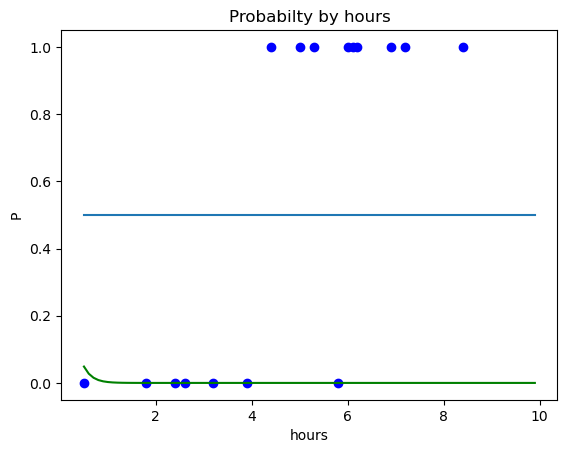

In [26]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range),0.5))  # X_range 갯수 만큼 0.5로 가득찬 배열 만들기
plt.title('Probabilty by hours')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

### 데이터 시각화(테스트 세트)

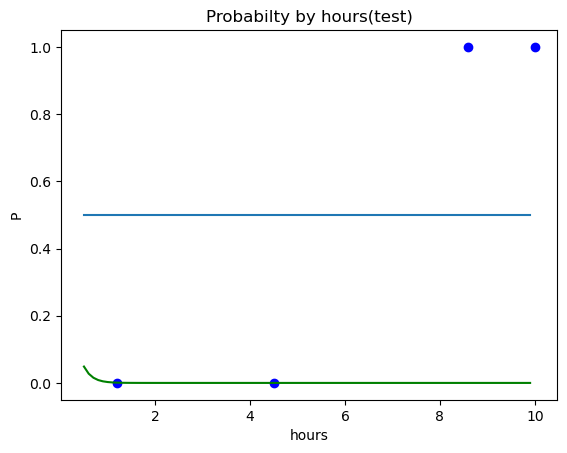

In [27]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range),0.5))  # X_range 갯수 만큼 0.5로 가득찬 배열 만들기
plt.title('Probabilty by hours(test)')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

In [28]:
classifier.predict_proba([[4.5]]) # 4.5시간 공부했을 때 확률(모델에서는 51% 확률로 합격 예측, 실제로는 불합격)

array([[0.48310686, 0.51689314]])

### 혼돈 행렬(Confusuoin Matrix)

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm  # 어디가 맞고 틀린지를 쉽게 확인할 수 있게한다.


# TRUE NEGATIVE(TN)     FALSE POSITIVE(FP)
# 불합격(예측),           합격(예측)
# 불합격(실제),           불합격(실제)

#FALSE NEGATIVE(FN)    TRUE POSITIVE(TP)
#불합격(예측),           합격(예측)
#합격(실제),             합격(실제)

array([[1, 1],
       [0, 2]], dtype=int64)